In [1]:
%pylab inline
import programas as pg
import h5py
import MAS_library as MASL
import smoothing_library as SL

Populating the interactive namespace from numpy and matplotlib


In [29]:
h0 = h5py.File('parameters_rmin=16_k0.754.h5','r')
h1 = h5py.File('parameters_rmin=20_k0.754.h5','r')

In [21]:
h0.keys()

<KeysViewHDF5 ['b1_samples', 'b2_samples', 'b4_samples']>

In [30]:
b1_16 = h0['b1_samples'][()]
b2_16 = h0['b2_samples'][()]
b4_16 = h0['b4_samples'][()]

b1_20 = h1['b1_samples'][()]
b2_20 = h1['b2_samples'][()]
b4_20 = h1['b4_samples'][()]

b1_mean = np.mean(b1_20)
b2_mean = np.mean(b2_20)
b4_mean = np.mean(b4_20)

BACCO: 1.3361171450061098 0.6406884692743877 4.62790441275628


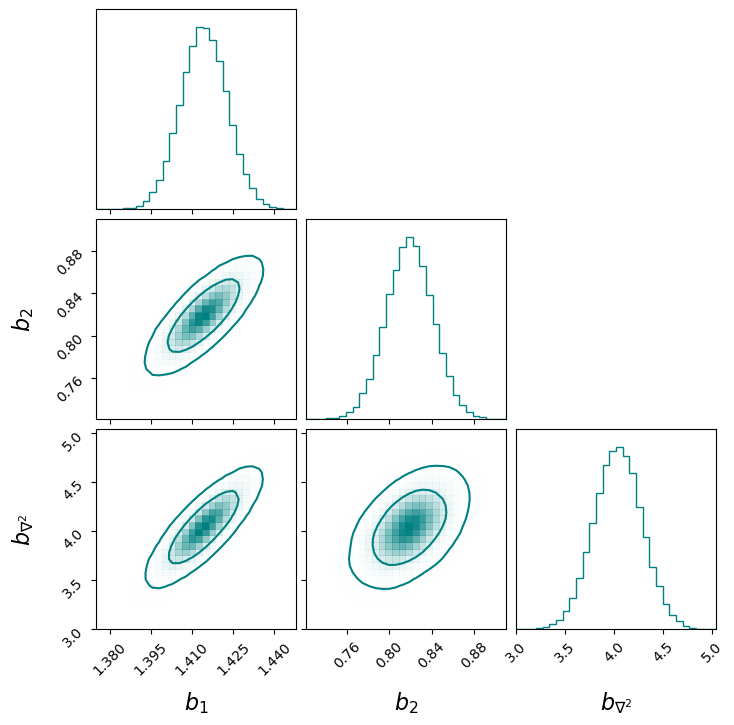

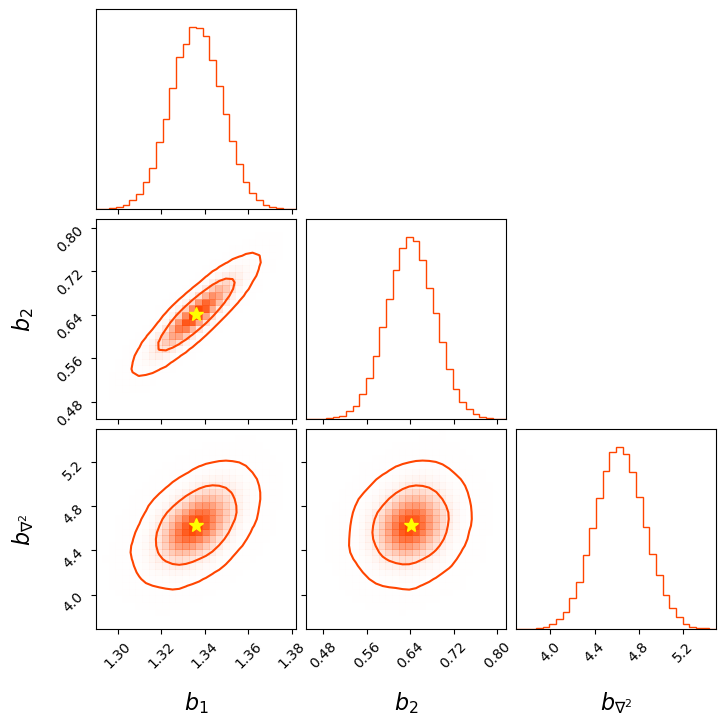

In [31]:
import corner
import random


#seleccion = random.sample(list(np.arange(0,len(b1_samples))),30000)
# Crear el gráfico de corner con tres parámetros
figure = corner.corner(np.vstack([b1_16, b2_16, b4_16]).T,
                       labels=["$ b_1 $", "$b_2$", "$ b_{\\nabla^2} $"],
                       bins=30, smooth=1.0, plot_datapoints=False,
                       plot_contours=True, fill_contours=False,
                       levels=[0.68, 0.95],
                       label_kwargs={"fontsize": 16},
                       color='teal')

figure = corner.corner(np.vstack([b1_20, b2_20, b4_20]).T,
                       labels=["$ b_1 $", "$b_2$", "$ b_{\\nabla^2} $"],
                       bins=30, smooth=1.0, plot_datapoints=False,
                       plot_contours=True, fill_contours=False,
                       levels=[0.68, 0.95],
                       label_kwargs={"fontsize": 16},
                       color='orangered')

# Obtener los ejes del corner plot
axes = figure.axes
# Agregar la estrellita en el panel correspondiente a (b1, b2)
#axes[3].plot(b1_jens, b2_jens, marker='*', color='red', markersize=10)
axes[3].plot(b1_mean, b2_mean, marker='*', color='yellow', markersize=10)
# Agregar la estrellita en el panel correspondiente a (b1, b4)
#axes[6].plot(b1_jens, b4_jens, marker='*', color='red', markersize=10)
axes[6].plot(b1_mean, b4_mean, marker='*', color='yellow', markersize=10)
# Agregar la estrellita en el panel correspondiente a (b2, b4)
#axes[7].plot(b2_jens, b4_jens, marker='*', color='red', markersize=10)
axes[7].plot(b2_mean, b4_mean, marker='*', color='yellow', markersize=10)

#print('BACCO:',b1_jens, b2_jens, b4_jens)
print('BACCO:',b1_mean, b2_mean, b4_mean)

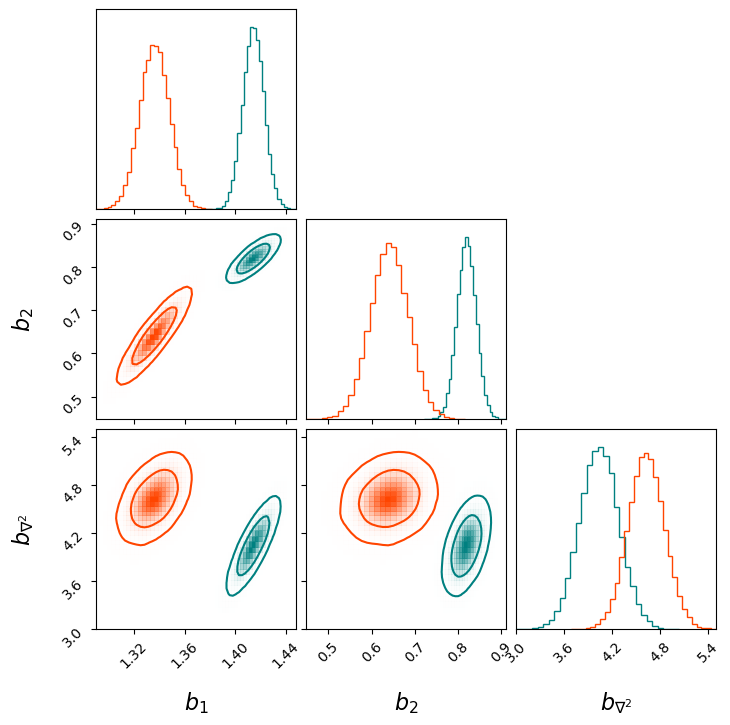

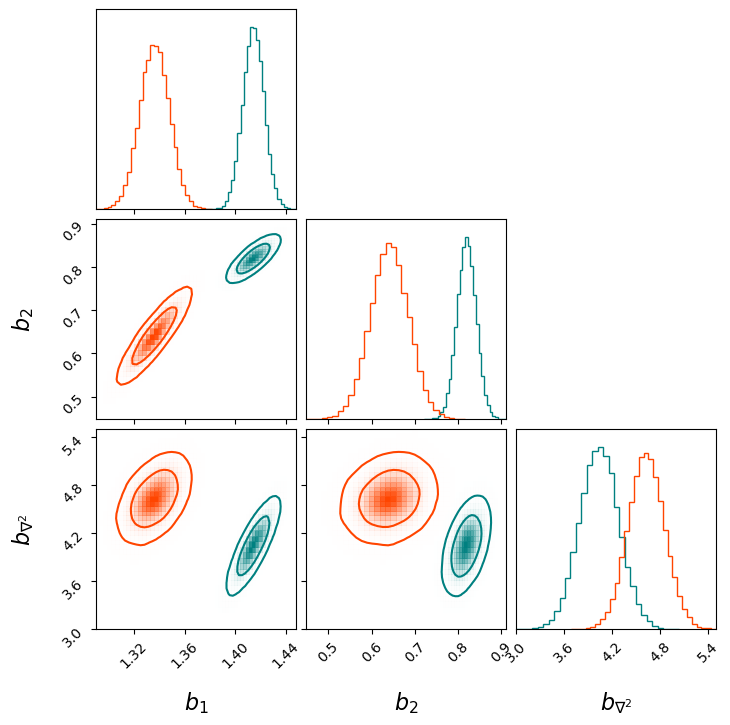

In [32]:
import corner
import numpy as np

# Crear el gráfico de corner con tres parámetros para el primer conjunto de datos
figure = corner.corner(np.vstack([b1_16, b2_16, b4_16]).T,
                       labels=["$b_1$", "$b_2$", "$ b_{\\nabla^2}$"],
                       bins=30, smooth=1.0, plot_datapoints=False,
                       plot_contours=True, fill_contours=False,
                       levels=[0.68, 0.95],
                       label_kwargs={"fontsize": 16},
                       color='teal')

# Superponer el segundo conjunto de datos sobre la misma figura
corner.corner(np.vstack([b1_20, b2_20, b4_20]).T,
              fig=figure,  # Especificar la figura existente
              labels=["$b_1$", "$b_2$", "$ b_{\\nabla^2}$"],
              bins=30, smooth=1.0, plot_datapoints=False,
              plot_contours=True, fill_contours=False,
              levels=[0.68, 0.95],
              label_kwargs={"fontsize": 16},
              color='orangered')